# Python and R in a single Notebook 

From the instructions of [all-spark-notebook](https://github.com/jupyter/docker-stacks/tree/master/all-spark-notebook) and [Stackoverflow](https://stackoverflow.com/questions/39008069/r-and-python-in-one-jupyter-notebook).


In [1]:
import datetime
print('Last run:', datetime.datetime.utcnow(), 'UTC')  # timezone can't be detected from browser

Last run: 2019-12-19 09:09:24.610738 UTC


## Processing in Python
* Create a dataframe
* load the rpy2 module

In [2]:
import numpy as np
import pandas as pd
n = 100
df = pd.DataFrame({
    'cups_of_coffee': np.random.exponential(3, size=n),
    'productivity': np.random.normal(100, 15, n),
    'gender': np.random.choice(["f", "m"], n)
})

In [3]:
%load_ext rpy2.ipython

## Processing in R

* Install and load ggplot2
* Receive the dataframe and set the figure size including resolution
* Plot the dataframe

In [4]:
%%R
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


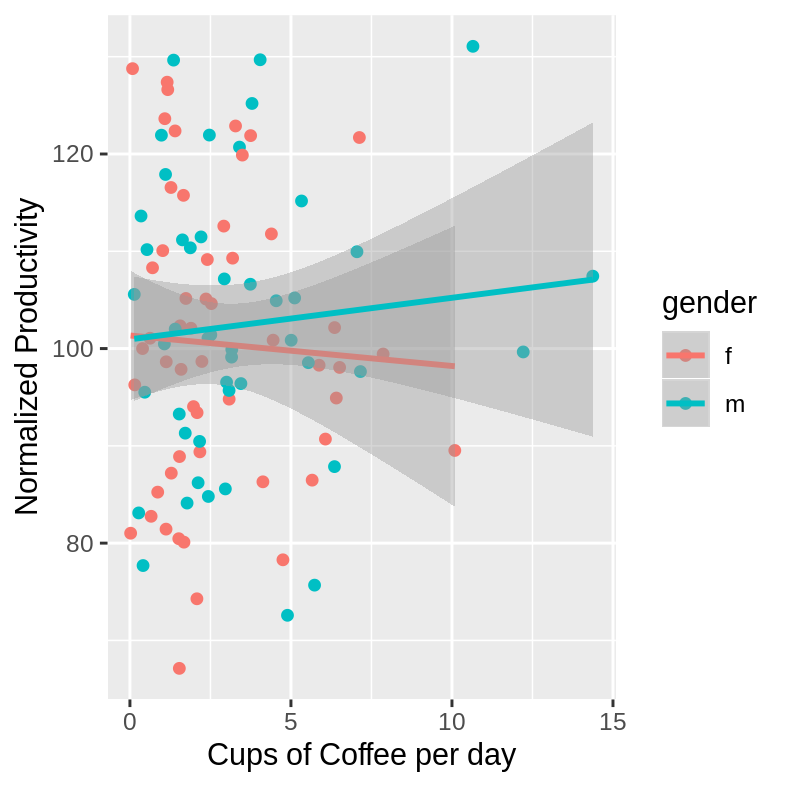

In [5]:
%%R -i df -w 10 -h 10 --units cm -r 200
ggplot(df, aes(x=cups_of_coffee, y=productivity, color=gender)) + geom_point() + 
geom_smooth(method="lm", se=TRUE) + ylab("Normalized Productivity") + xlab("Cups of Coffee per day")